In [1]:
#Libraries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.preprocessing as preprocessing
import statsmodels as sm
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load data
data= pd.read_csv("/Users/yawenhan/Documents/Python/adultdata.csv",names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],sep=r'\s*,\s*')
df= pd.DataFrame(data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [3]:
#Basic dataset info
print(data.shape)

(32561, 15)


In [4]:
#First 5 records
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preliminary Data Analysis

Let’s plot the distribution of each feature, so that we have a better understanding what we have in our data. We draw the number of values for each category feature and the histogram of the values for each continuous feature.

As you can see from the plots above our data is mostly concentrated in the USA with mostly private high-education white people.

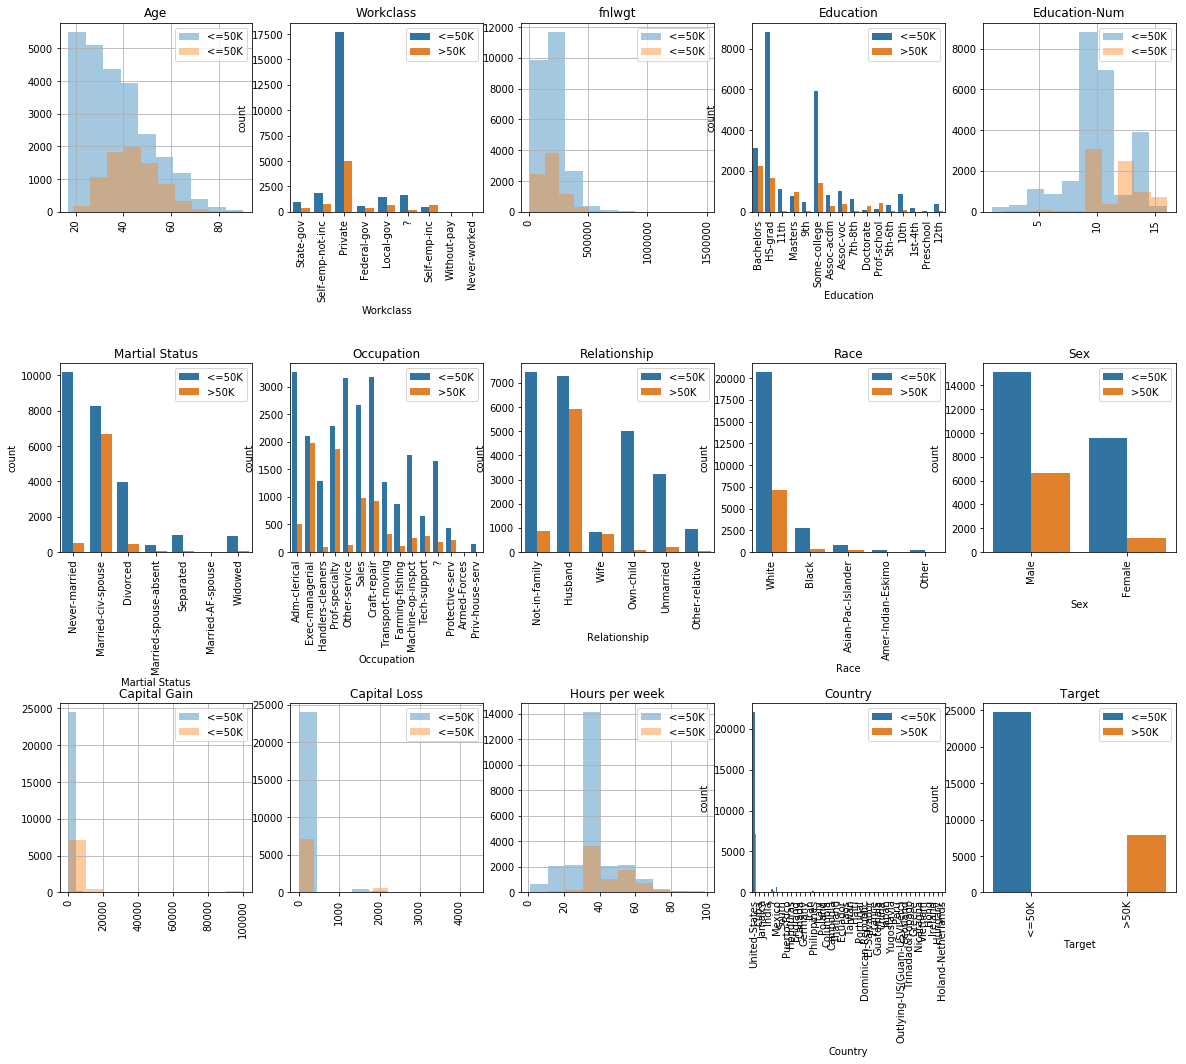

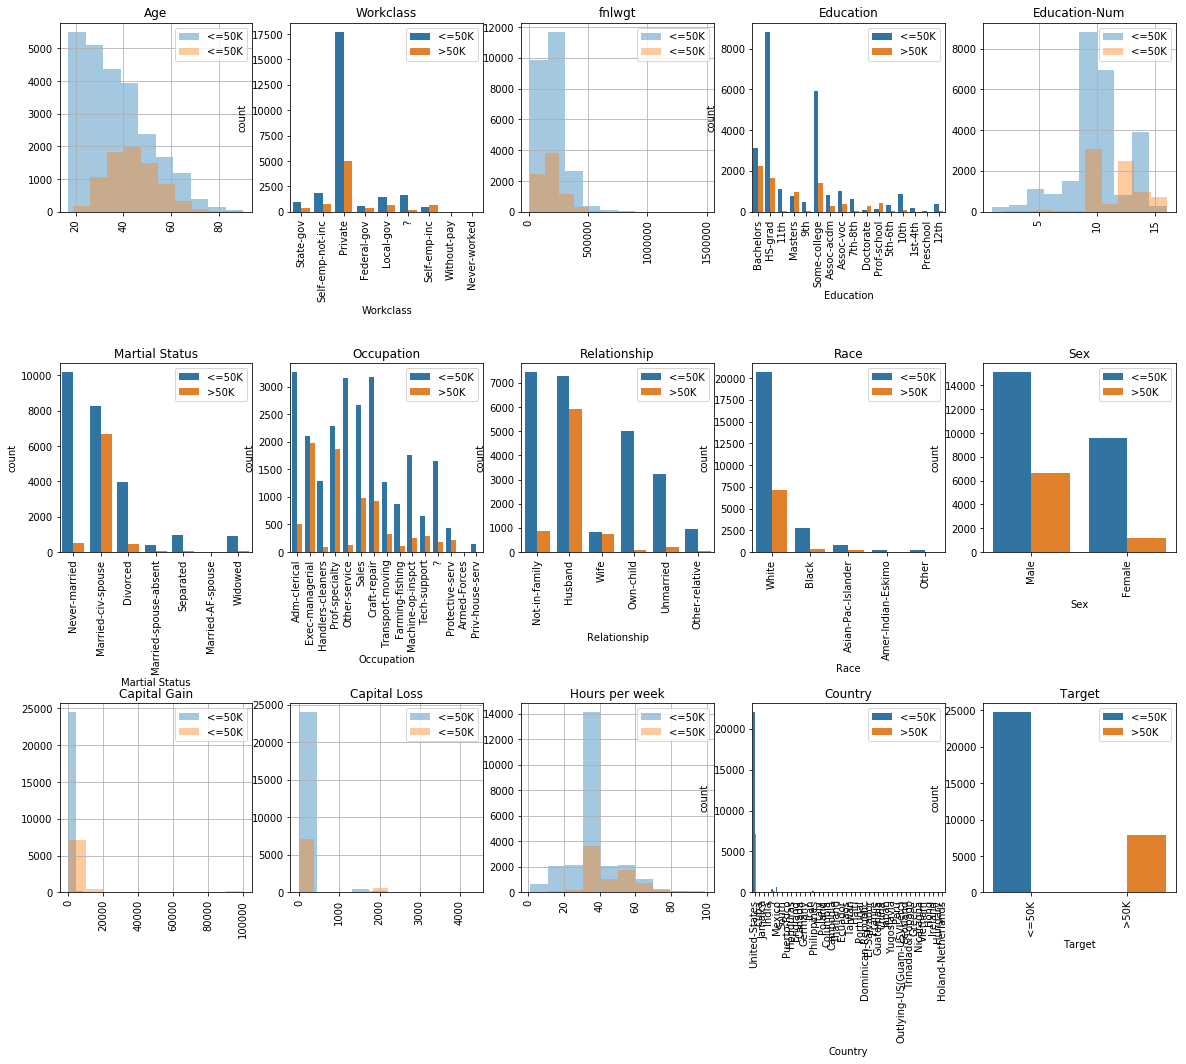

In [5]:
#Histogram for all attributes
fig = plt.figure(figsize=(20,16))
cols = 5
rows = 3
for i, column in enumerate(data.columns):
    
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        
        sns.countplot(data[column],hue=data['Target'],axes=ax)
        plt.xticks(rotation="vertical")
        plt.legend(loc='upper right')
        #data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        a=data.groupby("Target")[column].hist(alpha=0.4, axes=ax, label=['<=50K','>50K'])
        #plt.hist(b[column], bins=10, alpha=0.5, label='y')
        a=plt.legend(loc='upper right')
        
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.8, wspace=0.2)
display(fig)

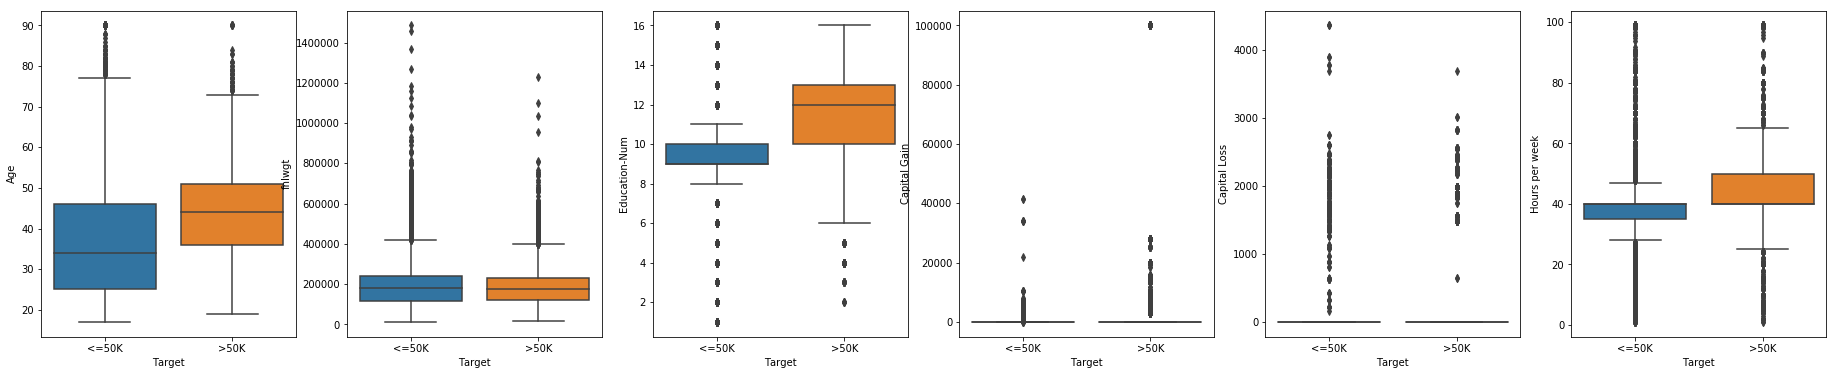

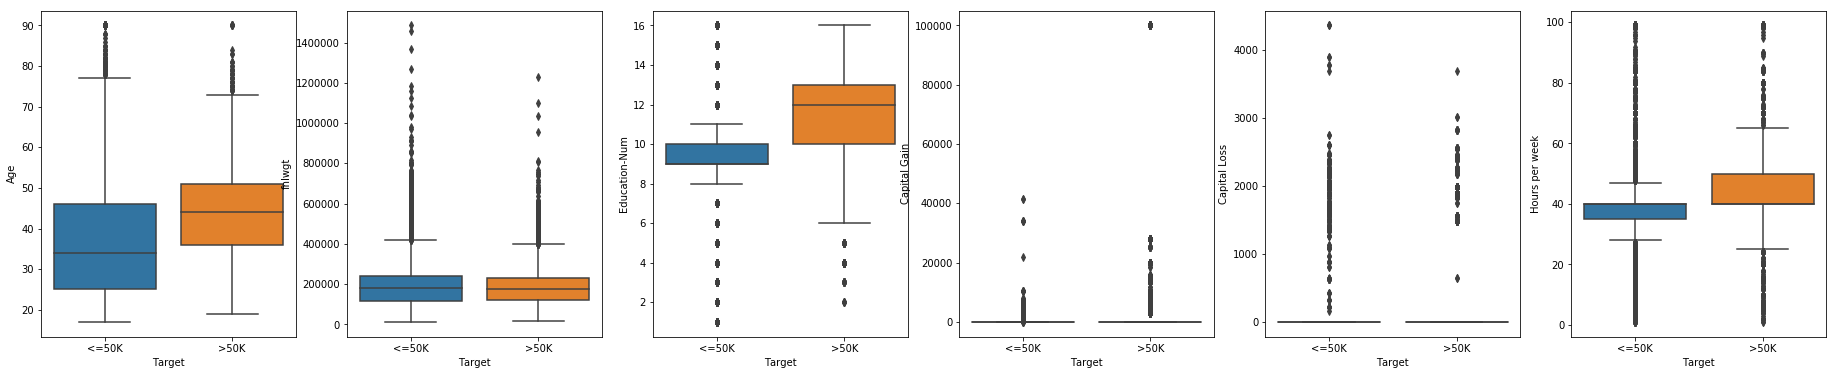

In [6]:
fig2, (a,b,c,d,e,f)= plt.subplots(1,6,figsize=(32,6))
sns.boxplot(y='Age',x='Target',data=df,ax=a)
sns.boxplot(y='fnlwgt',x='Target',data=df,ax=b)
sns.boxplot(y='Education-Num',x='Target',data=df,ax=c)
sns.boxplot(y='Capital Gain',x='Target',data=df,ax=d)
sns.boxplot(y='Capital Loss',x='Target',data=df,ax=e)
sns.boxplot(y='Hours per week',x='Target',data=df,ax=f)

### Data Selection - Missing Value

Also from the histogram above, there are still some missing values here coded with '?'in some sttibutes, such as Workclass. 

In [7]:
#Missing value info
def cc(x):
    return sum(x=='?')
ms=data.apply(cc)
ms=pd.DataFrame(ms)
ms=ms.transpose()
ms.index=['Total missing value']
ms

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Total missing value,0,1836,0,0,0,0,1843,0,0,0,0,0,0,583,0


### “Country” Feature Analysis

In [8]:
#Check the country distribution
country=(data.Country.value_counts())/32561
country=pd.DataFrame(country.head(16))
country=country.transpose()
country

,United-States,Mexico,?,Philippines,Germany,Canada,Puerto-Rico,El-Salvador,India,Cuba,England,Jamaica,South,China,Italy,Dominican-Republic
Country,0.895857,0.019748,0.017905,0.006081,0.004207,0.003716,0.003501,0.003255,0.003071,0.002918,0.002764,0.002488,0.002457,0.002303,0.002242,0.00215


## Data Transformation

### Missing Value Handling

In [9]:
#Drop missing value
data = data[data.Occupation !='?']
data = data[data.Country != '?']
ms2=data.apply(cc)
ms2=pd.DataFrame(ms2)
ms2=ms2.transpose()
ms2.index=['Total missing value']
ms2

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
Total missing value,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
print(data.shape)

(30162, 15)


In [11]:
#Check the country distribution
country=(data.Country.value_counts())/30162
country=pd.DataFrame(country.head(16))
country=country.transpose()
country

,United-States,Mexico,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,Jamaica,South,Italy,China,Dominican-Republic,Vietnam
Country,0.911876,0.020224,0.006233,0.004244,0.003614,0.003548,0.003315,0.003315,0.00305,0.002851,0.002652,0.002354,0.002254,0.002254,0.002221,0.002122


### "Country" Feature Simplification

In [12]:
#Make Country attribute easier to analysis
data.loc[data['Country']!='United-States','Country'] = 'Non_USA'

data['occupation'] = data['Occupation'].map({'Farming-fishing': 0, 'Tech-support': 1, 
                                            'Adm-clerical': 2, 'Handlers-cleaners': 3, 'Prof-specialty': 4,
                                            'Machine-op-inspct': 5, 'Exec-managerial': 6, 
                                            'Priv-house-serv': 7, 'Craft-repair': 8, 'Sales': 9, 
                                            'Transport-moving': 10, 'Armed-Forces': 11, 'Other-service': 12, 
                                            'Protective-serv': 13}).astype(int)


data['Target'] = data['Target'].map({'<=50K': 0, '>50K': 1})

data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1}).astype(int)

data['Race'] = data['Race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4})

data['Martial Status'] = data['Martial Status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6})

### Catrgorical Features Discretization

In [13]:
#Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

#Calculate the correlation and plot
data, encoder = number_encode_features(data)

In [14]:
data.head(3)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,1,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,1,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,1,0


### Correlation among Features

#Correlation and heatmap
hmap = data.corr()
fig2 = plt.figure(figsize = (11,11))
sns.heatmap(hmap,vmax=1,annot=True,cmap="PuBu", square=True)
display(fig2)

We see there is a high correlation between Education and Education-Num.
So it seems that the data is mostly OK with the exception of Sex and Relationship, which seems to be negatively correlated. Let’s explore that for a bit
Yes. The data looks correlated, because for example Male and Husband are highly correlated values, as well as Female and Wife. There is no easy way to tackle this problem, so let’s carry on.

### Feature Subset Selection

independent, redundent, overfitting

In [15]:
del data["Education"]
del data["Relationship"]

From the output above, the correlation between "Target" and "Workclass","fnlwgt", "Race" is really small, which indicates there is no correlation inside these pairs. Therefore, these three attributes are removed to improve the accuracy of the model. 

In [16]:

data.to_csv("/Users/yawenhan/Documents/Python/Modified.csv")

In [17]:
data.head()

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,5,77516,13,4,0,4,1,2174,0,40,1,0
1,50,4,83311,13,2,3,4,1,0,0,13,1,0
2,38,2,215646,9,0,5,4,1,0,0,40,1,0
3,53,2,234721,7,2,5,2,1,0,0,40,1,0
4,28,2,338409,13,2,9,2,0,0,0,40,0,0


## Model Development

### Split and Scale the Features

Before we do that, let’s split the data into a train and test set. This is a common approach to avoid overfitting. If we train and test the classifiers on the same data we will always get awesome results and we will most probably overfit the model. However if we test a classifier on data it has never seen we can be more confident it will perform better when ran on new data.
Most machine learning algorithms like the features to be scaled with mean 0 and variance 1. This is called “removing the mean and scaling to unit variance”. This can be easily done with the StandardScaler from scikit-learn. Let’s scale the features and look at them again.

In [18]:
#Split and scale the data
x=data[data.columns]
del x["Target"]
y=data["Target"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, train_size=0.70)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

### Logistics Regression

The accuracy of the logistic regression on test set is 0.814676
The F-measure score of the logistic regression on test set is 0.551004


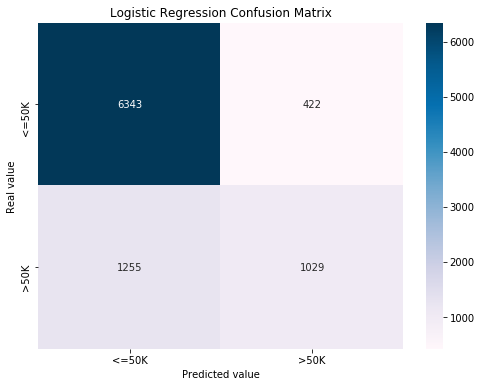

In [19]:
cls = linear_model.LogisticRegression()

cls_result=cls.fit(X_train, y_train)
cls_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, cls_pred)

cls_fig=plt.figure(figsize=(18,6))
cls_cm = cls_fig.add_subplot(1, 2, 1)
cls_cm=sns.heatmap(cm, cmap="PuBu",annot=True, fmt="d", xticklabels=encoder["Target"].classes_, yticklabels=encoder["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.title('Logistic Regression Confusion Matrix')
print("The accuracy of the logistic regression on test set is %f" % metrics.accuracy_score(cls_pred,y_test))
print ("The F-measure score of the logistic regression on test set is %f" % skl.metrics.f1_score(cls_pred,y_test))
coefs = pd.Series(cls.coef_[0], index=X_train.columns)


In [20]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)

scoring = 'accuracy'
cls_results = model_selection.cross_val_score(cls, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (cls_results.mean()))

10-fold cross validation average accuracy: 0.820063


In [21]:
coefs=pd.DataFrame(coefs)
coefs=coefs.transpose()
coefs.index=['Coefficient']
coefs

,Age,Workclass,fnlwgt,Education-Num,Martial Status,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
Coefficient,0.515942,-0.110379,0.055568,0.871914,-0.338518,0.009177,0.127122,0.542064,2.407328,0.280013,0.332597,0.016491


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


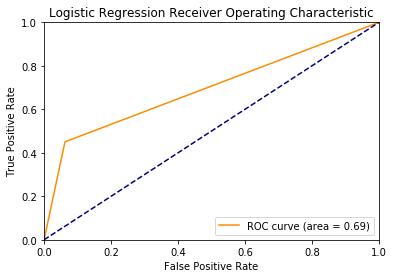

In [22]:
# calculate the fpr and tpr for all thresholds of the classification
cls_roc = cls_fig.add_subplot(1, 2, 2)
fpr, tpr, threshold = metrics.roc_curve(y_test, cls_pred)
roc_auc = metrics.auc(fpr, tpr)

cls_roc=plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.legend(loc="lower right")
cls_fig.show()

### Decision Tree

The accuracy of the decision tree is 0.803293
The F-measure score of the decision tree is 0.611354
10-fold cross validation average accuracy: 0.807133


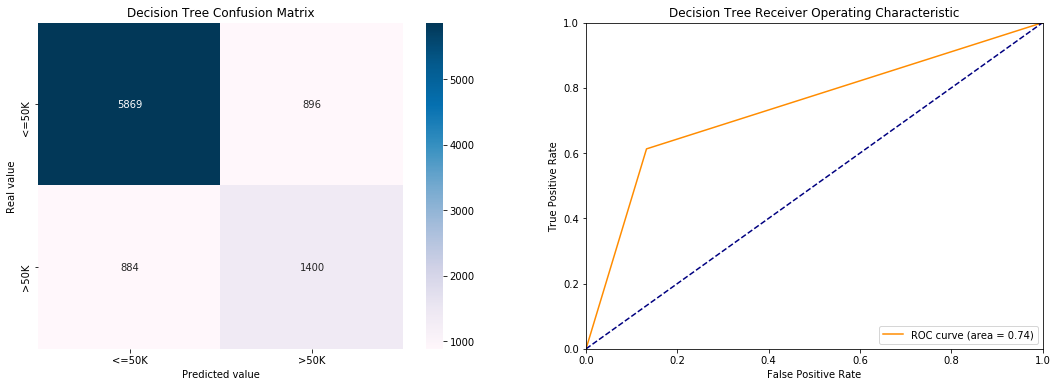

In [23]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)
cm = metrics.confusion_matrix(y_test, dtc_pred)

dtc_fig=plt.figure(figsize=(18,6))
dtc_cm = dtc_fig.add_subplot(1, 2, 1)

dtc_cm=sns.heatmap(cm, cmap="PuBu",annot=True, fmt="d", xticklabels=encoder["Target"].classes_, yticklabels=encoder["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.title('Decision Tree Confusion Matrix')
print("The accuracy of the decision tree is %f" % metrics.accuracy_score(dtc_pred,y_test))
print ("The F-measure score of the decision tree is %f" % skl.metrics.f1_score(dtc_pred,y_test))

dtc_results = model_selection.cross_val_score(dtc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (dtc_results.mean()))






# calculate the fpr and tpr for all thresholds of the classification
dtc_roc = dtc_fig.add_subplot(1, 2, 2)
fpr, tpr, threshold = metrics.roc_curve(y_test, dtc_pred)
roc_auc = metrics.auc(fpr, tpr)

dtc_roc=plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic')
plt.legend(loc="lower right")


### Artificial Neural Network

Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. 

The accuracy of the artificial neural network is 0.836667
The F-measure score of the artificial neural network is 0.638100
10-fold cross validation average accuracy: 0.838061


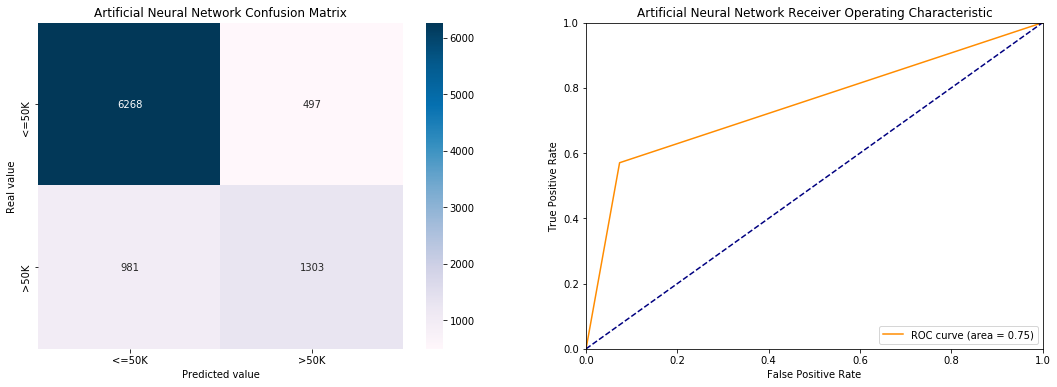

In [24]:
from sklearn.neural_network import MLPClassifier
ann= MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(X_train, y_train)  
ann_pred=ann.predict(X_test)
cm = metrics.confusion_matrix(y_test, ann_pred)

ann_fig=plt.figure(figsize=(18,6))
ann_cm = ann_fig.add_subplot(1, 2, 1)

ann_cm=sns.heatmap(cm, cmap="PuBu",annot=True, fmt="d", xticklabels=encoder["Target"].classes_, yticklabels=encoder["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.title('Artificial Neural Network Confusion Matrix')
print("The accuracy of the artificial neural network is %f" % metrics.accuracy_score(ann_pred,y_test))
print ("The F-measure score of the artificial neural network is %f" % skl.metrics.f1_score(ann_pred,y_test))

ann_results = model_selection.cross_val_score(ann, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (ann_results.mean()))





# calculate the fpr and tpr for all thresholds of the classification
ann_roc = ann_fig.add_subplot(1, 2, 2)
fpr, tpr, threshold = metrics.roc_curve(y_test, ann_pred)
roc_auc = metrics.auc(fpr, tpr)

ann_roc=plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Artificial Neural Network Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Support Vector Machine

The accuracy of the support vector machine is 0.801194
The F-measure score of the support vector machine is 0.427252
10-fold cross validation average accuracy: 0.807559


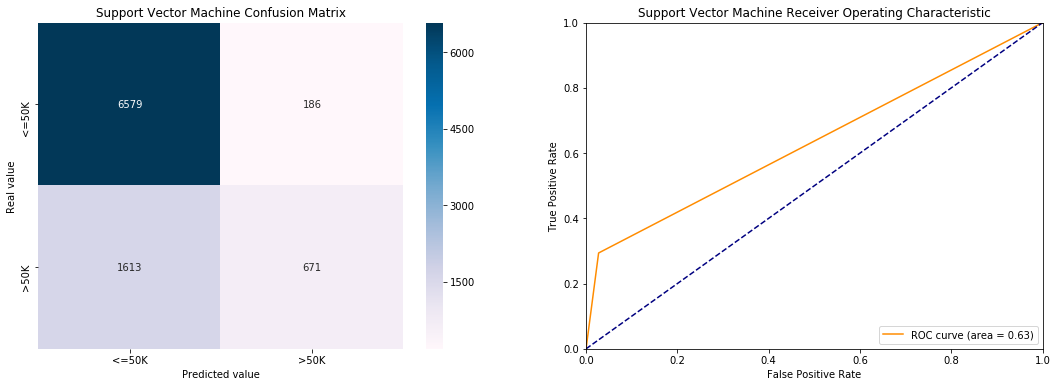

In [25]:
#SVM
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
svm_pred=svc.predict(X_test)

cm = metrics.confusion_matrix(y_test, svm_pred)

svm_fig=plt.figure(figsize=(18,6))
svm_cm = svm_fig.add_subplot(1, 2, 1)

svm_cm=sns.heatmap(cm, cmap="PuBu",annot=True, fmt="d", xticklabels=encoder["Target"].classes_, yticklabels=encoder["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.title('Support Vector Machine Confusion Matrix')
print("The accuracy of the support vector machine is %f" % metrics.accuracy_score(svm_pred,y_test))
print ("The F-measure score of the support vector machine is %f" % skl.metrics.f1_score(svm_pred,y_test))

svm_results = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (svm_results.mean()))




# calculate the fpr and tpr for all thresholds of the classification
svm_roc = svm_fig.add_subplot(1, 2, 2)
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_pred)
roc_auc = metrics.auc(fpr, tpr)

svm_roc=plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Ensemble Learner - Random Forest

The accuracy of the random forest is 0.848160
The F-measure score of the random forest is 0.670819
10-fold cross validation average accuracy: 0.851323


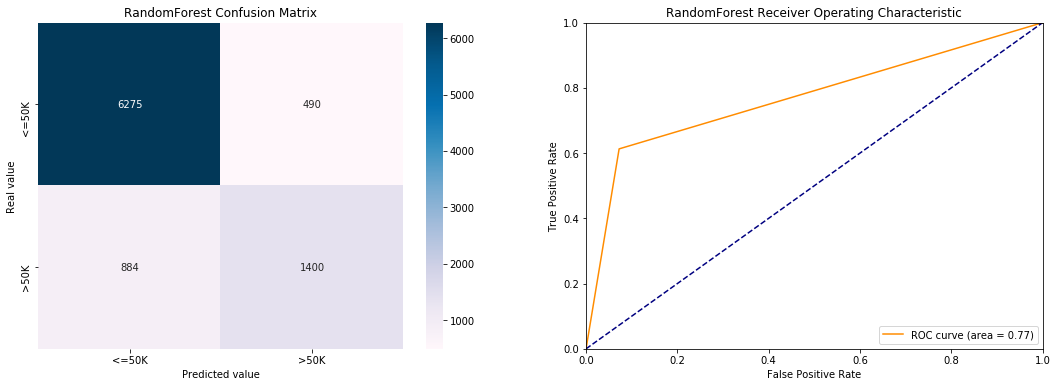

In [26]:
# Build model on training data
from sklearn.ensemble import RandomForestClassifier

# n_estimators is the amount of trees to build
rfc=RandomForestClassifier(n_estimators=25)
# fit the RandomForest Model
rfc=rfc.fit(X_train, y_train)
# prediction scoring of the model (array of binary 0-1)
rfc_pred=rfc.predict(X_test)
# confusion matrix / missclassification matrix
skl.metrics.confusion_matrix(y_test,rfc_pred)
skl.metrics.accuracy_score(y_test, rfc_pred)

cm = metrics.confusion_matrix(y_test, rfc_pred)

rf_fig=plt.figure(figsize=(18,6))
rf_cm = rf_fig.add_subplot(1, 2, 1)
rf_cm=sns.heatmap(cm, cmap="PuBu",annot=True, fmt="d", xticklabels=encoder["Target"].classes_, yticklabels=encoder["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.title('RandomForest Confusion Matrix')
print("The accuracy of the random forest is %f" % metrics.accuracy_score(rfc_pred,y_test))
print ("The F-measure score of the random forest is %f" % skl.metrics.f1_score(rfc_pred,y_test))

rf_results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (rf_results.mean()))





# calculate the fpr and tpr for all thresholds of the classification
rf_roc = rf_fig.add_subplot(1, 2, 2)
fpr, tpr, threshold = metrics.roc_curve(y_test, rfc_pred)
roc_auc = metrics.auc(fpr, tpr)

rf_roc=plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Receiver Operating Characteristic')
plt.legend(loc="lower right")

## Model Evaluation

In the income level classification scenario, assume you are testing on some data where 99% of the instances represent people who earn less than or equal to 50K per year. It is possible to achieve a 0.99 accuracy by predicting the class “<=50K” for all instances. The classifier in this case appears to be doing a good job overall, but in reality, it fails to classify any of the high-income individuals (the 1%) correctly.

For that reason, it is helpful to compute additional metrics that capture more specific aspects of the evaluation. 

Going back to the income classification problem, we would want to ask several evaluation questions that help us understand the performance of the classifier used. A very natural question is: ‘Out of the individuals whom the model predicted to be earning >50K (TP+FP), how many were classified correctly (TP)?’ This question can be answered by looking at the Precision of the model, which is the proportion of positives that are classified correctly: TP/(TP+FP). Another common question is “Out of all the high earning employees with income >50k (TP+FN), how many did the classifier classify correctly (TP)”. This is actually the Recall, or the true positive rate: TP/(TP+FN) of the classifier. You might notice that there is an obvious trade-off between precision and recall. For example, given a relatively balanced dataset, a classifier that predicts mostly positive instances, would have a high recall, but a rather low precision as many of the negative instances would be misclassified resulting in a large number of false positives. 

Another related metric that is often used is the F1 Score, which takes both precision and recall into consideration. It is the harmonic mean of these 2 metrics and is computed as such: F1 = 2 (precision x recall) / (precision + recall). The F1 score is a good way to summarize the evaluation in a single number, but it’s always a good practice to look at both precision and recall together to better understand how a classifier behaves.

In addition, one can inspect the true positive rate vs. the false positive rate in the Receiver Operating Characteristic (ROC) curve and the corresponding Area Under the Curve (AUC) value. The closer this curve is to the upper left corner, the better the classifier’s performance is (that is maximizing the true positive rate while minimizing the false positive rate). Curves that are close to the diagonal of the plot, result from classifiers that tend to make predictions that are close to random guessing.